In [7]:
%matplotlib inline

In [9]:
from __future__ import division

In [43]:
from scipy.io import loadmat
from scipy.misc import imread, toimage
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math


In [12]:
def g_fx(x):
    return 1. / (1. + np.exp(-x))

In [13]:
# def g_fx(X):
#     g = np.vectorize(g_element_wise)
#     # applt on all elems
#     g_of_X = g(X)
#     return g_of_X.T

In [14]:
def g_dash_fx(x):
    return g_fx(x) * (1. - g_fx(x))

In [15]:
def get_img_and_data_matrix(img, f):
    img_small = img[:186, :186]
    img_small = img_small.ravel()
    data_matrix = np.random.random((225, 186 * 186))
    for i in range(len(f)):
        data_matrix[i] = img_small
    temp = list()
    temp.append(img_small)
    img_small = np.array(temp)
    return img_small.T, data_matrix

In [70]:
eta = 1

In [71]:
def gradient_desc(img, f, N):
    s, data_matrix = get_img_and_data_matrix(img, f)
    print 
    for i in range(N):
        ft_X = np.dot(f.T, data_matrix)
        g_vec = g_fx(ft_X)
        s_T_minus_g_vec = s.T - g_vec
        g_vec_dash = g_dash_fx(ft_X)
        hadamard_product = np.multiply(s_T_minus_g_vec, g_vec_dash)
        error = -(2/186.)* np.sum( np.dot(data_matrix, hadamard_product.T))
        f=f + eta * np.fabs(error)
        print 'iterations done : ', i, error

    print 'data_matrix shape : ', data_matrix.shape
    print 'f.T shape : ', f.T.shape
    s_new = np.dot(f.T, data_matrix)
    s_new = s_new.reshape((186, 186))
    print s_new.shape
    return s_new


In [72]:
test_image = imread('./sgx_test.jpg')

In [73]:
test_image_bw = test_image / 255.0
f = np.random.random((225, 1))
f = np.random.uniform(low=0.001, high=1, size=(225,1))

In [74]:
x = gradient_desc(test_image_bw, f, 200)


iterations done :  0 0.913908662108
iterations done :  1 0.0816493201821
iterations done :  2 0.0724629290938
iterations done :  3 0.0656093919779
iterations done :  4 0.0602496839198
iterations done :  5 0.0559126028077
iterations done :  6 0.0523107345889
iterations done :  7 0.0492577280364
iterations done :  8 0.0466269172793
iterations done :  9 0.0443288975327
iterations done :  10 0.0422985854723
iterations done :  11 0.0404873651342
iterations done :  12 0.0388581173951
iterations done :  13 0.0373819620061
iterations done :  14 0.0360360572242
iterations done :  15 0.0348020747757
iterations done :  16 0.0336651187227
iterations done :  17 0.032612943604
iterations done :  18 0.0316353789114
iterations done :  19 0.0307238986842
iterations done :  20 0.0298712950087
iterations done :  21 0.0290714271179
iterations done :  22 0.0283190263074
iterations done :  23 0.0276095426112
iterations done :  24 0.026939023102
iterations done :  25 0.026304014412
iterations done :  26 0.0

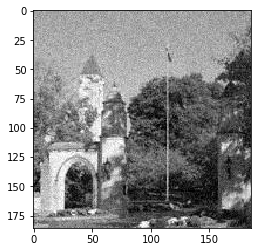

In [75]:
plt.imshow(x)
plt.gray()

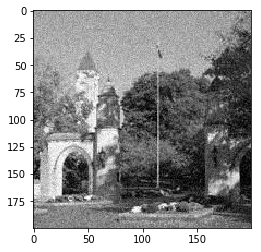

In [76]:
plt.imshow(test_image_bw)